In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Dropout, Resizing, Rescaling
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers  import L2

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_directory = r'C:\Users\Admin\Documents\GitHub\Face-Recognition-With-LenetModel\Famous Person Dataset\train'
val_directory = r'C:\Users\Admin\Documents\GitHub\Face-Recognition-With-LenetModel\Famous Person Dataset\valid'
CLASS_NAME = ['bill_gates', 'elon_musk', 'jeff_bezos', 'mark_zuckerberg', 'steve_jobs']
CONFIGURATION = {
    'BATCH_SIZE':32,
    'IM_SIZE': 128,
    'LEARNING_RATE': 0.005,
    'N_EPOCHS': 10,
    'DROPOUT_RATE': 0.0,
    'REGULARIZATION_RATE':0.0,
    'N_FILTERS': 6,
    'KERNEL_SIZE':3,
    'N_STRIDES': 1,
    'POOL_SIZE':2,
    'N_DENSE_1':100,
    'N_DENSE_2':10,
    'NUM_CLASSES':5
    }

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAME,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99
)

Found 2968 files belonging to 5 classes.


In [4]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAME,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99,
    )

Found 914 files belonging to 5 classes.


In [5]:
training_dataset = (
    train_dataset.prefetch(tf.data.AUTOTUNE)
    )

In [6]:
validation_dataset = (
    val_dataset.prefetch(tf.data.AUTOTUNE)
    )

In [7]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    Rescaling(1./255),
    ])

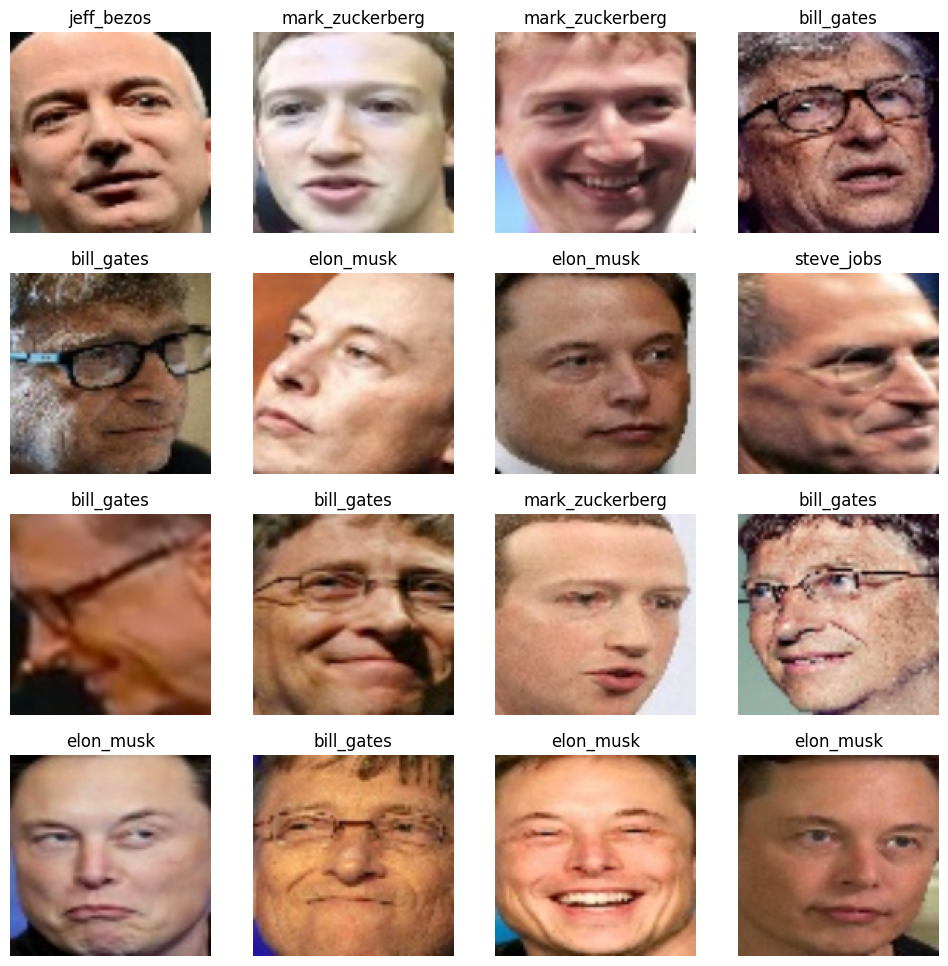

In [8]:
plt.figure(figsize = (12,12))
for images, labels in training_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4, i+1)
        plt.imshow(images[i]/255.)
        plt.title(CLASS_NAME[tf.argmax(labels[i], axis = 0).numpy()])
        plt.axis('off')

In [9]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),
    
    resize_rescale_layers,
    
    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),
    
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),
    
    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 6)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)       

In [10]:
loss_function = CategoricalCrossentropy()
metrics = CategoricalAccuracy(name = "accuracy")
lenet_model.compile(optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]), loss= loss_function, metrics = metrics)

In [11]:
history = lenet_model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose= 1)

Epoch 1/10
93/93 [==============================] - 28s 280ms/step - loss: 0.9479 - accuracy: 0.6675 - val_loss: 1.5679 - val_accuracy: 0.4300
Epoch 2/10
93/93 [==============================] - 33s 355ms/step - loss: 0.3157 - accuracy: 0.9084 - val_loss: 1.0482 - val_accuracy: 0.5525
Epoch 3/10
93/93 [==============================] - 28s 296ms/step - loss: 0.1332 - accuracy: 0.9636 - val_loss: 0.7733 - val_accuracy: 0.6827
Epoch 4/10
93/93 [==============================] - 27s 287ms/step - loss: 0.0974 - accuracy: 0.9720 - val_loss: 0.7257 - val_accuracy: 0.7648
Epoch 5/10
93/93 [==============================] - 25s 264ms/step - loss: 0.1289 - accuracy: 0.9575 - val_loss: 1.5873 - val_accuracy: 0.5897
Epoch 6/10
93/93 [==============================] - 24s 254ms/step - loss: 0.1081 - accuracy: 0.9653 - val_loss: 0.1672 - val_accuracy: 0.9519
Epoch 7/10
93/93 [==============================] - 24s 257ms/step - loss: 0.0443 - accuracy: 0.9885 - val_loss: 0.7576 - val_accuracy: 0.7965

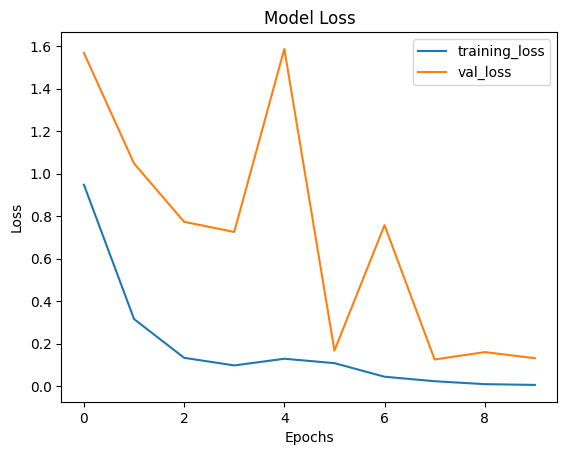

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training_loss','val_loss'])
plt.show()

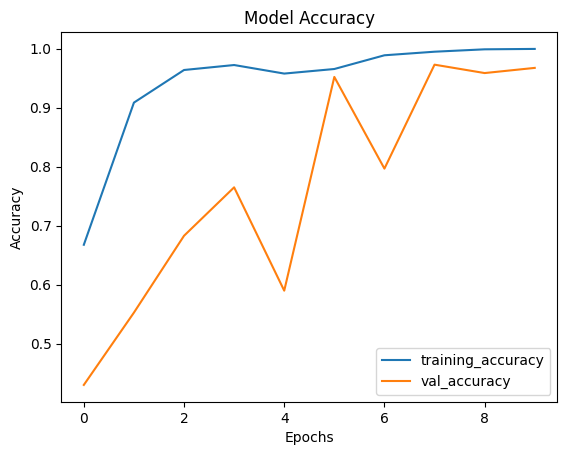

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training_accuracy','val_accuracy'])
plt.show()

In [14]:
lenet_model.evaluate(validation_dataset)

29/29 [==============================] - 2s 72ms/step - loss: 0.1315 - accuracy: 0.9672


[0.13147452473640442, 0.9671772718429565]

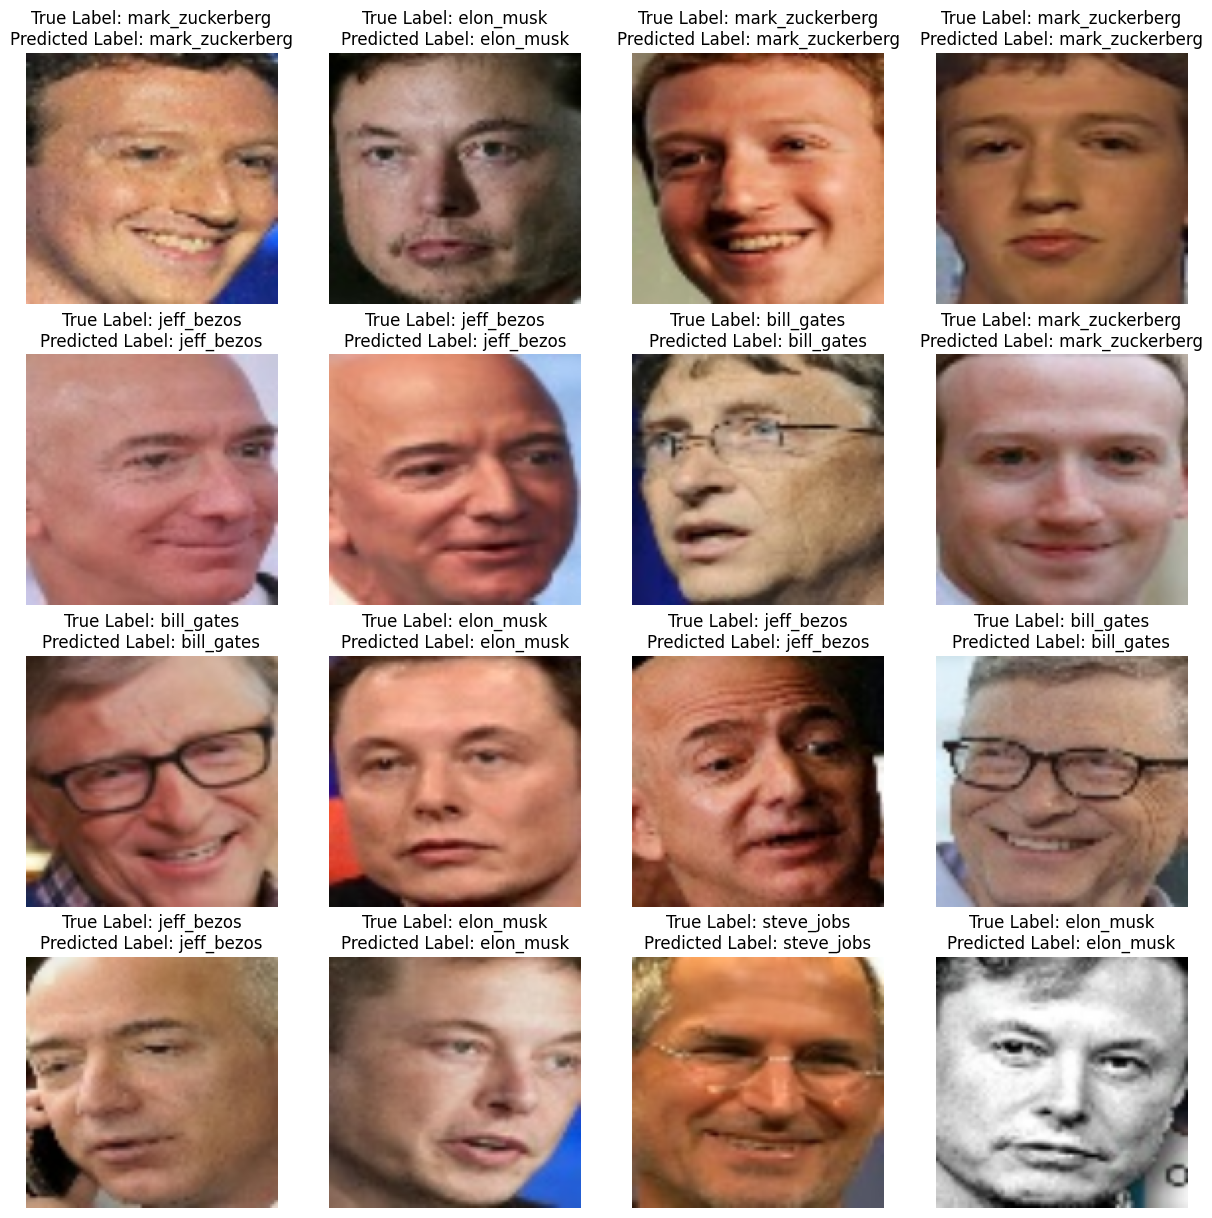

In [20]:
plt.figure(figsize = (15,15))
for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title('True Label: ' + CLASS_NAME[tf.argmax(labels[i], axis = 0).numpy()] + '\n' + 'Predicted Label: ' + 
              CLASS_NAME[tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)),axis = -1).numpy()[0]])
    plt.axis('off')

In [21]:
predicted = []
labels = []
for im, label, in validation_dataset:
    predicted.append(lenet_model(im))
    labels.append(label.numpy())

In [22]:
print(np.argmax(labels[:-1], axis= -1).flatten())
print(np.argmax(predicted[:-1], axis= -1).flatten())

[0 0 1 0 3 2 4 0 1 0 0 2 0 3 2 1 2 3 3 2 0 4 0 2 2 3 0 2 1 2 0 2 3 2 2 3 0
 2 2 3 0 1 4 1 0 3 4 1 2 0 1 1 0 3 1 0 3 0 1 2 2 3 0 1 2 2 1 0 3 0 3 2 3 3
 3 1 1 3 2 0 1 1 4 2 2 1 2 0 0 2 3 1 0 0 0 1 0 2 2 3 4 2 3 1 1 0 2 2 2 2 1
 0 2 1 0 1 1 1 4 1 0 1 4 1 3 2 4 1 3 0 2 0 0 2 0 0 3 1 1 3 1 0 2 2 1 2 0 1
 3 1 1 2 4 0 0 3 4 2 0 1 0 3 0 1 0 2 3 0 2 3 3 2 2 2 3 1 2 0 1 0 2 3 2 4 1
 2 3 0 1 2 3 3 2 1 1 0 1 4 2 0 4 0 2 2 2 0 0 2 0 3 2 3 0 1 0 3 4 4 1 0 2 3
 3 2 3 0 3 1 4 0 3 0 3 0 3 0 2 4 3 3 3 0 3 2 2 2 0 1 2 2 0 2 3 2 3 4 3 2 1
 3 2 0 2 3 3 0 2 3 4 2 3 0 2 3 3 3 1 1 1 2 1 2 0 3 3 3 2 0 1 3 0 2 4 2 0 3
 3 3 1 0 1 3 2 0 0 4 1 0 1 0 0 3 2 2 2 0 3 2 3 3 0 0 2 1 0 2 2 3 1 1 1 2 0
 3 1 3 2 1 1 1 1 1 1 3 0 3 1 2 0 3 2 2 3 1 3 3 1 2 2 4 1 2 0 1 3 0 3 0 0 2
 1 2 2 1 3 2 2 3 2 0 2 2 3 2 1 0 0 3 3 0 0 3 1 3 0 1 1 2 3 1 4 1 1 0 3 1 2
 1 2 1 3 4 3 0 4 1 3 0 2 0 1 2 2 2 4 3 2 1 1 0 3 1 3 0 1 1 1 0 1 2 3 3 1 2
 1 1 1 3 3 0 4 0 0 4 0 4 3 4 3 2 1 0 3 2 2 0 4 1 1 1 1 2 0 3 1 0 2 3 4 2 1
 1 2 2 3 3 0 1 0 0 0 3 1 

[[213   0   3   0   1]
 [  2 179   5   4   2]
 [  3   1 203   0   2]
 [  1   2   0 207   2]
 [  0   0   2   0  64]]


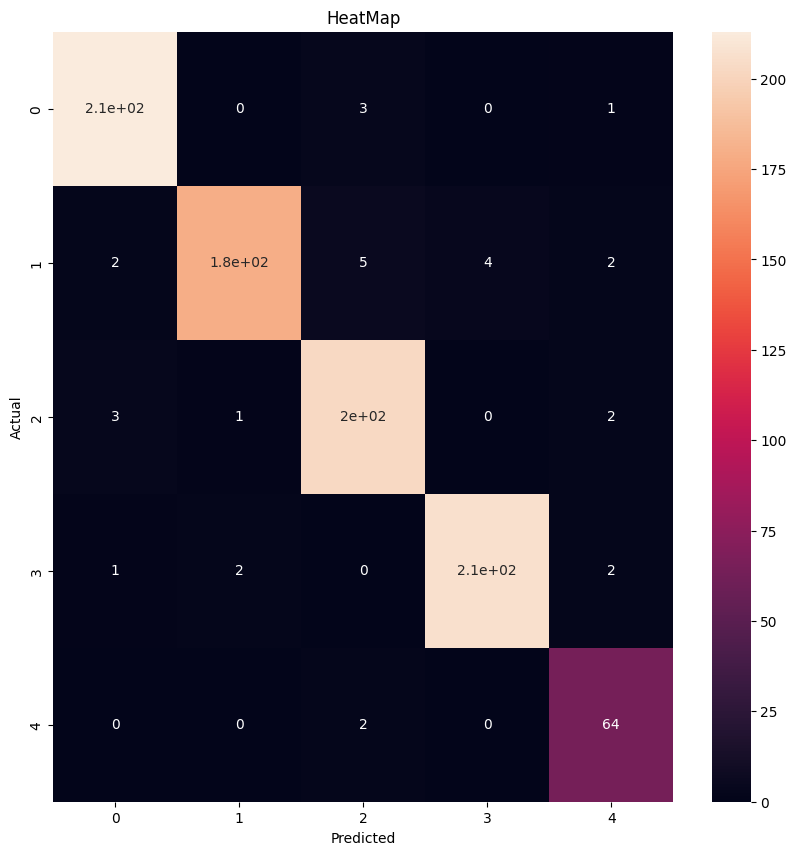

In [23]:
pred = np.argmax(predicted[:-1], axis= -1).flatten()
lab = np.argmax(labels[:-1], axis= -1).flatten()

cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,)
plt.title("HeatMap")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()